**Lab 4**

Done By: R Vignesh Prasath,2282417

**Handwritten-digits-recognition**

A script that trains a model to recognize handwritten digits using the data set. Then it loads external files and uses the neural network to predict what digits they are.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
print("Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1")

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=3)

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print("Loss:",val_loss)
    print("Accuracy:",val_acc)

    # Saving the model
    model.save('handwritten_digits.model')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.model')

Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1
Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2548 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1058 - accuracy: 0.9665
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9721
Loss: 0.09052874892950058
Accuracy: 0.972100019454956


1/1 [==============================] - 0s 102ms/step
The number is probably a 7


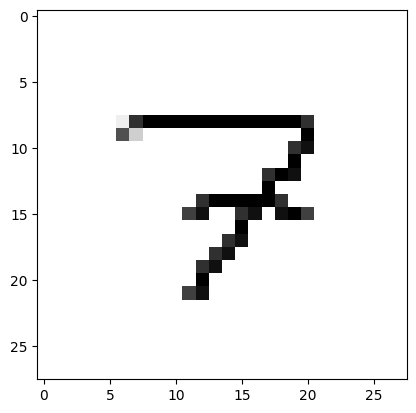

1/1 [==============================] - 0s 22ms/step
The number is probably a 2


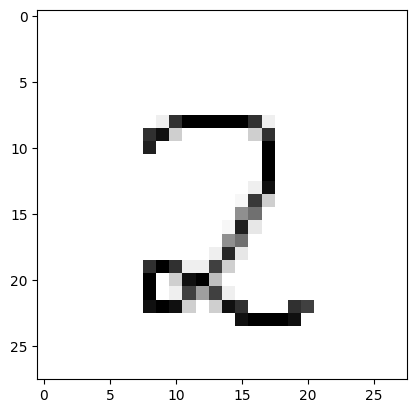

1/1 [==============================] - 0s 21ms/step
The number is probably a 9


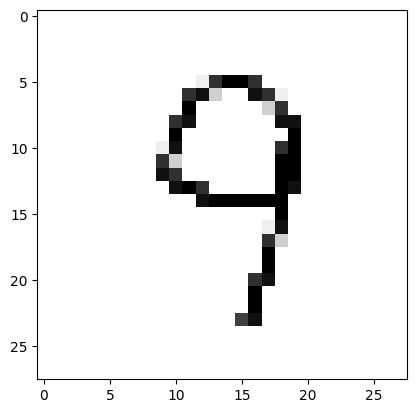

1/1 [==============================] - 0s 20ms/step
The number is probably a 8


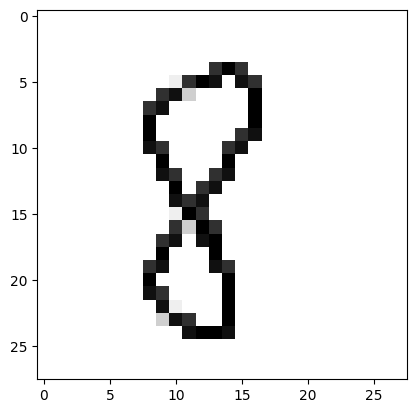

1/1 [==============================] - 0s 20ms/step
The number is probably a 5


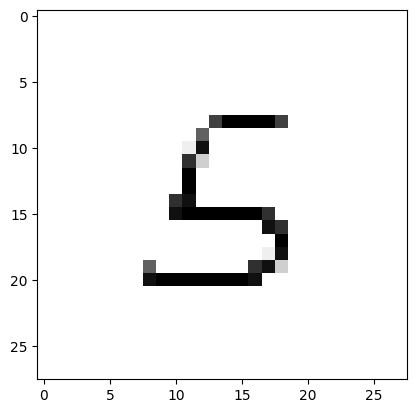

1/1 [==============================] - 0s 22ms/step
The number is probably a 6


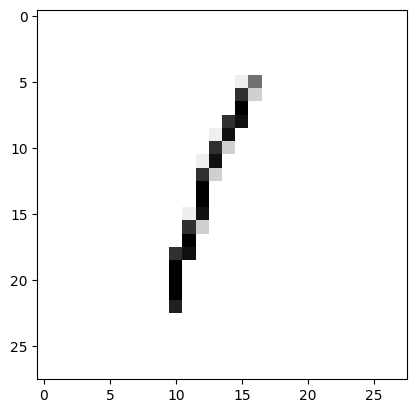

1/1 [==============================] - 0s 21ms/step
The number is probably a 1


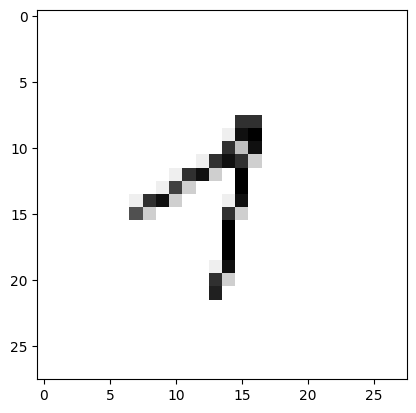

1/1 [==============================] - 0s 21ms/step
The number is probably a 1


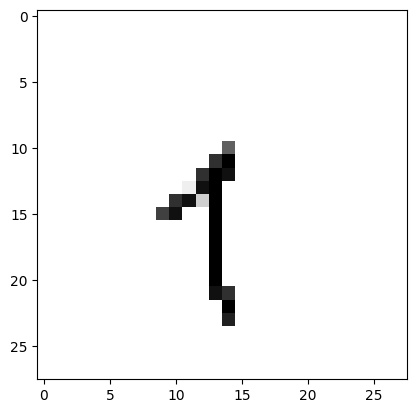

1/1 [==============================] - 0s 20ms/step
The number is probably a 7


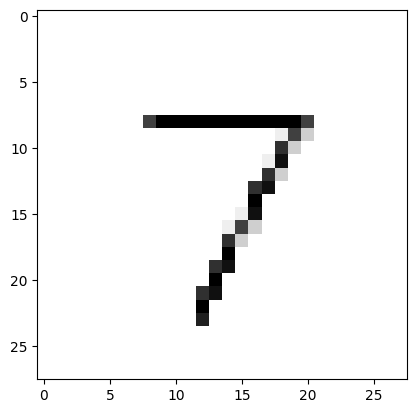

1/1 [==============================] - 0s 21ms/step
The number is probably a 7


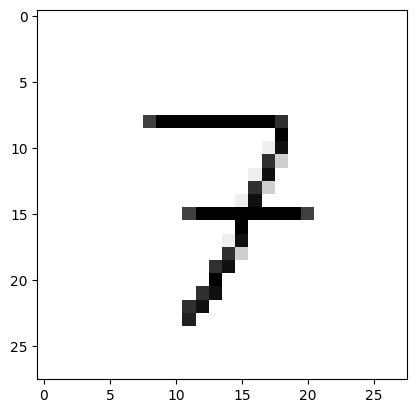

In [10]:
# Load custom images and predict them
image_number = 1
while os.path.isfile(f"/content/sample_data/digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"/content/sample_data/digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The number is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except:
        print("Error reading image! Proceeding with next image...")
    finally:
        image_number += 1
